In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import scipy
import statsmodels.stats.multitest as multiple

data_folder = './MovieSummaries/'

plot = pd.read_csv(data_folder+'plot_summaries.txt', sep='	', header=None, names=["wiki_id", "summary"])
movie_meta = pd.read_csv(data_folder+'movie.metadata.tsv', sep='	', header=None, names=["wiki_id", "freebase_id", "movie_name", "release_date", "revenue", "runtime", "languages", "coutries", "genres"])
char_meta = pd.read_csv(data_folder+'character.metadata.tsv', sep='	', header=None, names=["wiki_id", "freebase_id", "release_date", "character_name", "birth", "gender", "height", "ethnicity", "actor_name", "actor_age", "character_actor_map", "character_id", "actor_id"])
#tvtropes_clusters = pd.read_csv(data_folder+'tvtropes.clusters.txt')
#name_clusters = pd.read_csv(data_folder+'name.clusters.txt')
df = plot.merge(movie_meta, on="wiki_id", how='right')
df["languages"] = df.apply(lambda x: list(eval(x["languages"]).values()), axis=1)
df["coutries"] = df.apply(lambda x: list(eval(x["coutries"]).values()), axis=1)
df["genres"] = df.apply(lambda x: list(eval(x["genres"]).values()), axis=1)

In [2]:
import datetime

df.summary = df.summary.fillna('')
df.loc[df['wiki_id']== 29666067, 'release_date'] = datetime.datetime(2010, 12, 2)
dates = pd.to_datetime(df['release_date'])
df['release_date'] = dates

df.sample(10)

,wiki_id,summary,freebase_id,movie_name,release_date,revenue,runtime,languages,coutries,genres
2467,3470692,The series begins in 82 BC when Julius Caesar ...,/m/09f6ky,Julius Caesar,2002-01-01,NaN,200.0,[English Language],"[United States of America, Italy, Germany, Net...",[Costume drama]
26972,5726392,Deputy John Johnson is a rookie in the Los A...,/m/0f1fx8,The Glass Shield,1995-06-02,3291163.0,109.0,[English Language],"[United States of America, France]","[Crime Fiction, Crime Thriller, Action, Drama]"
13676,1321163,"Bobby has ties to the local mafia boss, Max, b...",/m/04sn95,Made,2001-07-13,5480653.0,95.0,[English Language],[United States of America],"[Thriller, Crime Fiction, Drama, Comedy]"
25040,32191147,On the Crimean coast at the end of the 19th ce...,/m/0gx_38x,The White Poodle,1957-08-16,NaN,NaN,[Russian Language],[Soviet Union],[Drama]
81384,1777992,"Big John McMasters and ""Square John"" Sand ar...",/m/05w4jv,Boom Town,1940-08-30,NaN,119.0,[English Language],[United States of America],"[Buddy film, Adventure, Comedy-drama, Action/A..."
22867,76631,In lieu of a theme song and opening of the mo...,/m/0k5kh,Will Success Spoil Rock Hunter?,1957-01-01,4900000.0,90.0,[English Language],[United States of America],"[Romantic comedy, Parody, Media Satire, Workpl..."
3419,6420587,,/m/0g4q09,Child Marriage,2005-01-01,NaN,86.0,"[Hindi Language, English Language]",[United States of America],[Documentary]
60113,1110047,"The film is set in Coalwood, West Virginia in ...",/m/046vs6,October Sky,1999-02-19,34675800.0,108.0,[English Language],[United States of America],"[Biography, Family Drama, Period piece, Coming..."
11168,30424498,,/m/0gkq_m0,Don't Look Back,1999-01-01,NaN,75.0,[],[Japan],[Japanese Movies]
69981,20281099,,/m/02rs1wb,Dheera,2009-01-14,NaN,NaN,[Tamil Language],[India],[Animation]


In [3]:
def proportion_of_movies_with_war_in_summary(df):
    pd.options.mode.chained_assignment = None
    num_of_movies_by_year = df.groupby(df.release_date.dt.year)['wiki_id'].count()
    war_movies = df[df.summary.str.lower().str.contains('war')]
    war_movies['release_date'] = dates
    war_movies_by_year_summary = war_movies.groupby(war_movies.release_date.dt.year)['wiki_id'].count()
    war_movies_by_year_summary = war_movies_by_year_summary/num_of_movies_by_year
    war_movies_by_year_summary = war_movies_by_year_summary.apply(lambda x: 0 if np.isnan(x) else x)
    war_movies_by_year_summary.plot.bar(rot=45, figsize=(10, 6))
    plt.locator_params(nbins=20)
    plt.title("Proportion of movies that have the word war in the summary by year")
    return war_movies_by_year_summary

In [4]:
def proportion_of_nazis_in_summary(df):
    pd.options.mode.chained_assignment = None
    num_of_movies_by_year = df.groupby(df.release_date.dt.year)['wiki_id'].count()
    war_movies = df[df.summary.str.lower().str.contains('nazi')]
    war_movies['release_date'] = dates
    war_movies_by_year_summary = war_movies.groupby(war_movies.release_date.dt.year)['wiki_id'].count()
    war_movies_by_year_summary = war_movies_by_year_summary/num_of_movies_by_year
    war_movies_by_year_summary = war_movies_by_year_summary.apply(lambda x: 0 if np.isnan(x) else x)
    war_movies_by_year_summary.plot.bar(rot=45, figsize=(10, 6))
    plt.locator_params(nbins=20)
    plt.title("Proportion of movies that have the word nazi in the summary by year")
    return war_movies_by_year_summary

In [5]:
def proportion_of_war_movies(df):
    num_of_movies_by_year = df.groupby(df.release_date.dt.year)['wiki_id'].count()

    war_movies_genre = df[df.genres.apply(lambda x :'War film' in x)]
    war_movies_by_year_genre = war_movies_genre.groupby(war_movies_genre.release_date.dt.year)['wiki_id'].count()
    war_movies_by_year_genre = war_movies_by_year_genre/num_of_movies_by_year
    war_movies_by_year_genre = war_movies_by_year_genre.apply(lambda x: 0 if np.isnan(x) else x)

    war_movies_by_year_genre.plot.bar(rot=45, figsize=(10, 6))
    plt.locator_params(nbins=20)
    plt.title("Proportion of War Films by year")
    return war_movies_by_year_genre

In [6]:
def proportion_of_anti_war_movies(df):
    num_of_movies_by_year = df.groupby(df.release_date.dt.year)['wiki_id'].count()

    war_movies_genre = df[df.genres.apply(lambda x :'Anti-war' in x)]
    war_movies_by_year_genre = war_movies_genre.groupby(war_movies_genre.release_date.dt.year)['wiki_id'].count()
    war_movies_by_year_genre = war_movies_by_year_genre/num_of_movies_by_year
    war_movies_by_year_genre = war_movies_by_year_genre.apply(lambda x: 0 if np.isnan(x) else x)
    war_movies_by_year_genre.plot.bar(rot=45, figsize=(10, 6))
    plt.locator_params(nbins=20)
    plt.title("Proportion of Anti-war Films by year")
    return war_movies_by_year_genre

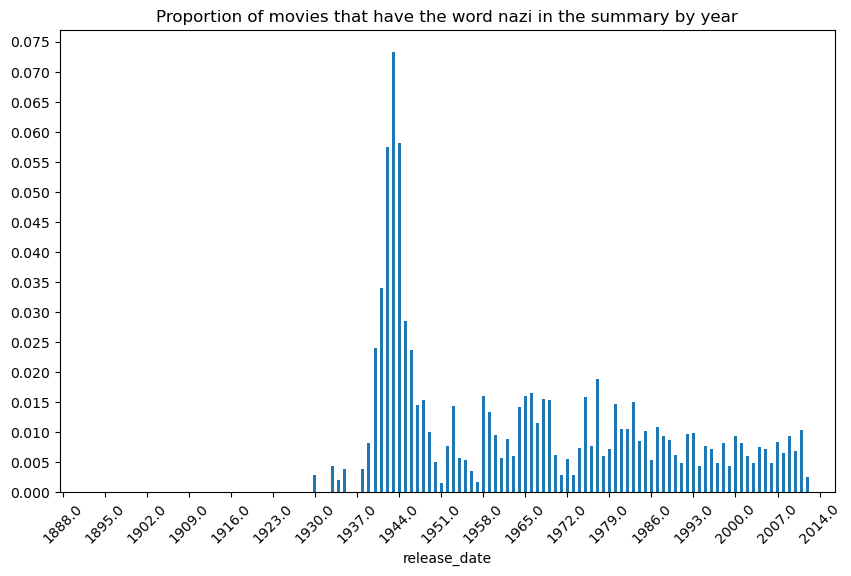

In [7]:
nazis_in_summaries=proportion_of_nazis_in_summary(df)

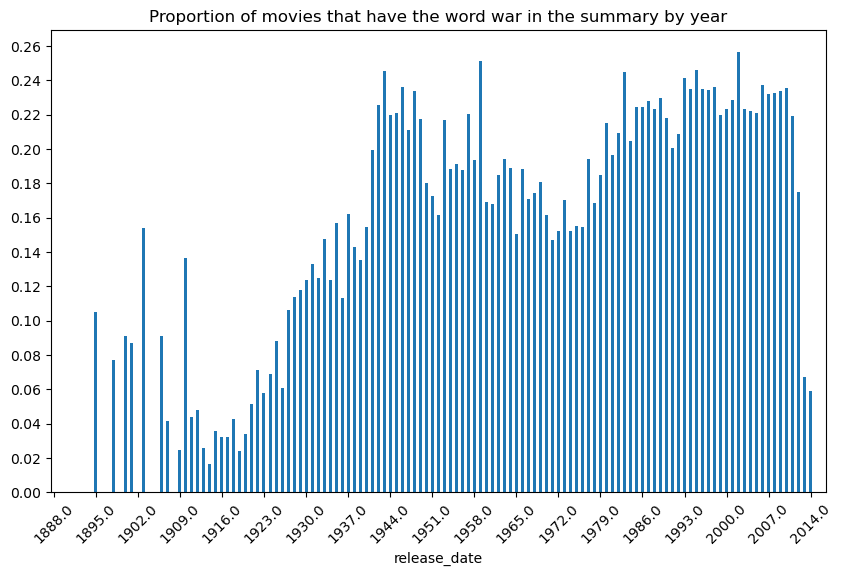

In [8]:
war_movies_by_year_summary=proportion_of_movies_with_war_in_summary(df)

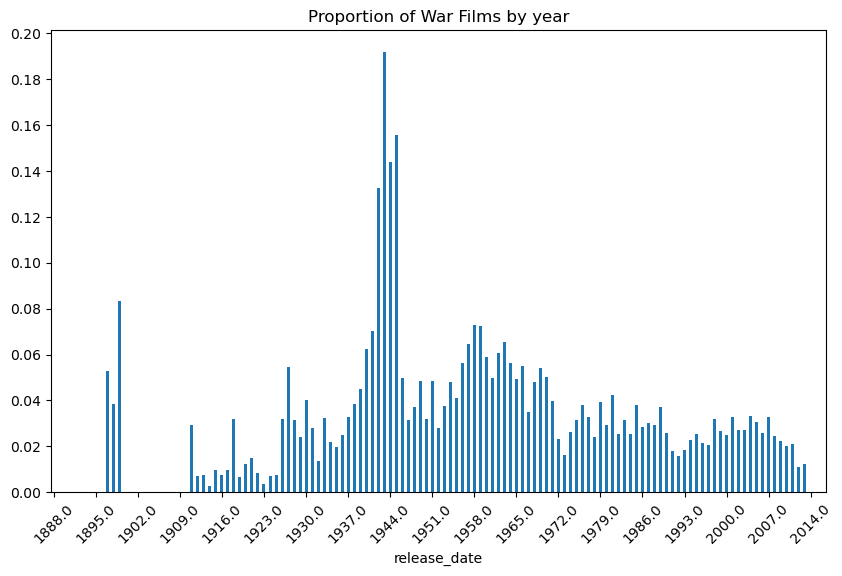

In [9]:
war_movies_by_year = proportion_of_war_movies(df)

In [10]:
WWII_ind = (1939,1945)

In [29]:
def p_value_for_diff_years(war_movies, ind, WWII_ind):
    WWII=war_movies.loc[(war_movies.index <= WWII_ind[1]) & (war_movies.index >= WWII_ind[0])]
    p_values = []
    for lower, upper in ind:
        other = war_movies.loc[(war_movies.index <= upper) & (war_movies.index >= lower)]
        stat, p_value = scipy.stats.ttest_ind(WWII, other)
        p_values.append(p_value)
    return p_values

In [12]:
a =np.arange(1918, 2000, 7)
b = np.arange(1924, 2007, 7)
indexes = list(zip(a,b))
p_values_genres = p_value_for_diff_years(war_movies_by_year, indexes, WWII_ind)
p_values_summaries = p_value_for_diff_years(war_movies_by_year_summary, indexes, WWII_ind)
p_values_nazis = p_value_for_diff_years(nazis_in_summaries, indexes, WWII_ind)

In [13]:
multi_genres = multiple.multipletests(p_values_genres, alpha=0.06)
multi_summaries = multiple.multipletests(p_values_summaries, alpha=0.06)
multi_nazis = multiple.multipletests(p_values_nazis, alpha=0.06)

C:\Users\basti\anaconda3\envs\ada\lib\site-packages\statsmodels\stats\multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [14]:
multi_nazis

(array([ True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True]),
 array([0.00651498, 0.00653679, 0.00836356, 1.        , 0.02641913,
        0.02641913, 0.02641913, 0.02641913, 0.02641913, 0.02641913,
        0.02114796, 0.02114796]),
 0.005143012831822946,
 0.005)

In [15]:
multi_summaries

(array([ True,  True,  True, False, False, False, False, False, False,
        False, False, False]),
 array([1.29408293e-05, 2.20886646e-03, 3.21182142e-02, 1.00000000e+00,
        9.94926623e-01, 9.74815149e-01, 7.46913311e-01, 3.61129771e-01,
        7.46913311e-01, 7.46913311e-01, 7.46913311e-01, 4.13588830e-01]),
 0.005143012831822946,
 0.005)

In [16]:
multi_genres

(array([ True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True]),
 array([0.00498761, 0.01565773, 0.01213519, 1.        , 0.02008493,
        0.05086072, 0.05086072, 0.02008493, 0.01565773, 0.01565773,
        0.01152255, 0.01213519]),
 0.005143012831822946,
 0.005)

In [17]:
usDf = df[df.coutries.apply(lambda x :'United States of America' in x)]

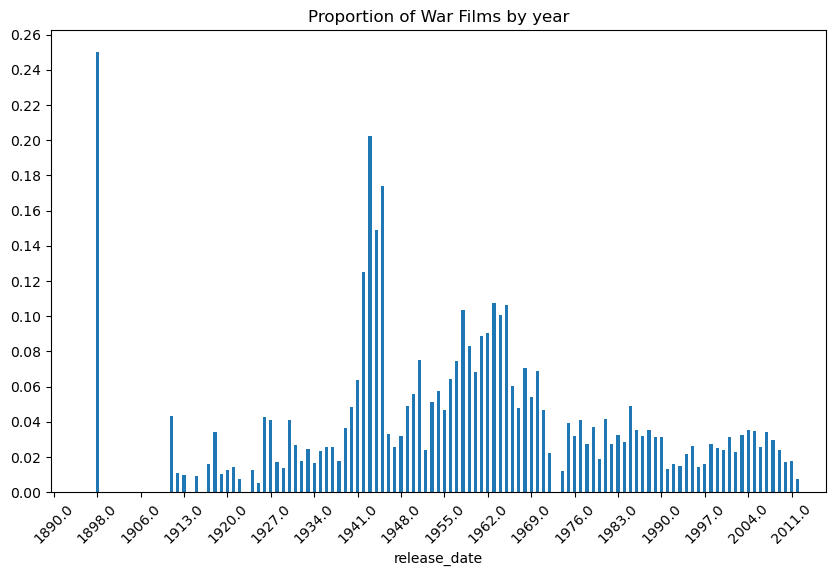

In [18]:
prop_war_films = proportion_of_war_movies(usDf)

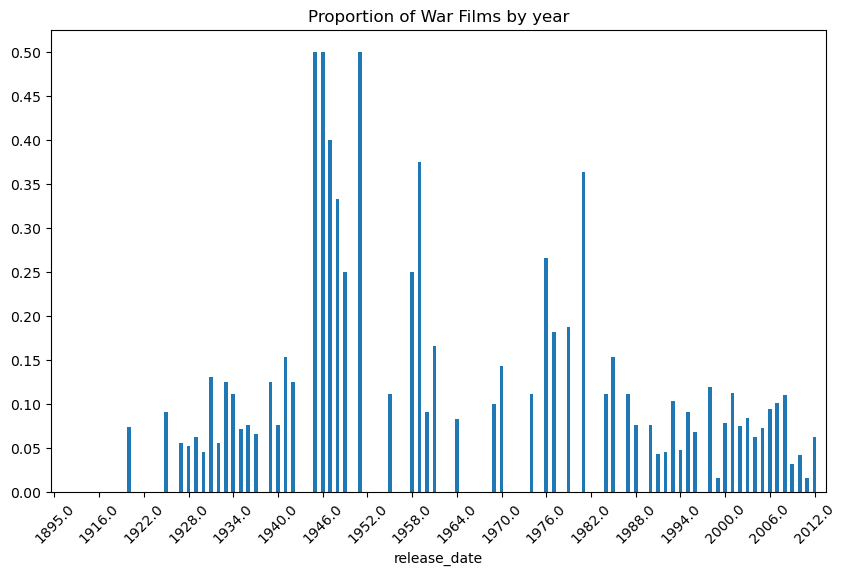

In [36]:
germanyDf = df[df.coutries.apply(lambda x :'Germany' in x)]
german_war_films =proportion_of_war_movies(germanyDf)

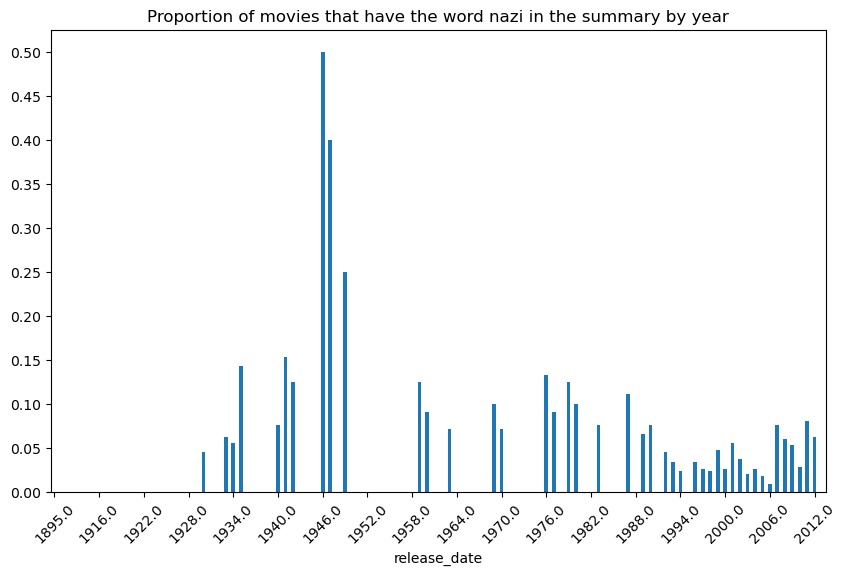

In [37]:
german_Nazi_movies = proportion_of_nazis_in_summary(germanyDf)

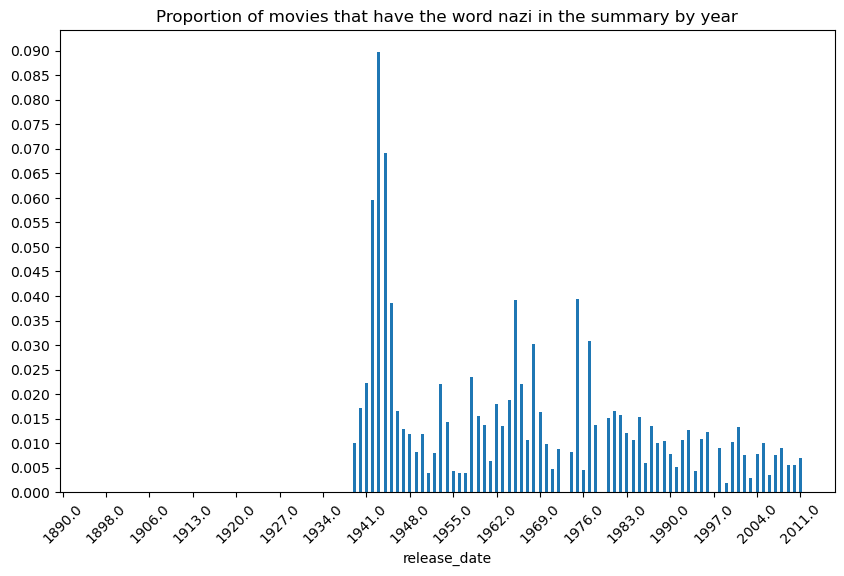

In [20]:
american_Nazi_movies = proportion_of_nazis_in_summary(usDf)

In [32]:
multiple.multipletests(p_value_for_diff_years(american_Nazi_movies, indexes, WWII_ind), alpha=0.06)

C:\Users\basti\anaconda3\envs\ada\lib\site-packages\statsmodels\stats\multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


(array([ True,  True,  True, False, False, False, False, False, False,
        False, False, False]),
 array([0.02563181, 0.02563181, 0.02563181, 1.        , 0.08484098,
        0.10503901, 0.13174959, 0.10503901, 0.13174959, 0.10503901,
        0.07857813, 0.07857813]),
 0.005143012831822946,
 0.005)